<a href="https://colab.research.google.com/github/abnermsousa/Preveja_chances_deixar_Streaming_desafio6/blob/main/Desafio_6_Preveja_os_usu%C3%A1rios_com_alta_chance_de_deixar_seu_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
sd = pd.read_csv('/content/streaming_data.csv')

# Visualizar as primeiras linhas dos dados
sd.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Descrição estatística dos dados
print(sd.describe())

                Age        Gender  Time_on_platform  Devices_connected  \
count  44956.000000  44956.000000      44956.000000       44956.000000   
mean      43.445725      0.784056       3176.932979           2.030786   
std       15.070854      0.738138       2906.097366           1.819905   
min       18.000000      0.000000          0.000000           0.000000   
25%       30.000000      0.000000          0.000000           0.000000   
50%       43.000000      1.000000       2725.000000           2.000000   
75%       57.000000      1.000000       5743.250000           4.000000   
max       69.000000      2.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating  
count            44956.000000         44956.000000  44956.000000  
mean                 0.308079             2.993460      2.340540  
std                  0.908555             1.411616      1.609168  
min                  0.000000             1.000000      0.000000 

In [ ]:
# Verificar os tipos de dados
print(sd.dtypes)

Age                         int64
Gender                      int64
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object


In [ ]:
# Verificar a quantidade de valores faltantes
print(sd.isna().sum())

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64


In [ ]:
# Substituir valores "NaN" por 0
sd.fillna({'Time_on_platform': 0, 'Devices_connected': 0, 'Num_streaming_services': 0, 'Avg_rating': 0, 'Churned': 0}, inplace=True)

In [ ]:
# Descartar linhas nulas
sd.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [ ]:
# Transformar valores de churned
sd['Churned'] = sd['Churned'].replace({0: 'No', 1: 'Yes'})

In [ ]:
# Converter coluna "Age" para o tipo inteiro
sd['Age'] = sd['Age'].astype(int)

In [ ]:
# Verificar se as alterações foram feitas corretamente
print(sd.isna().sum())
print(sd.dtypes)

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64
Age                         int64
Gender                      int64
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
# Definir variáveis X e y
X = sd.drop(columns=['Churned', 'User_id', 'Subscription_type'])
y = sd['Churned']

In [ ]:
# Codificar variáveis categóricas
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

In [ ]:
# Separar em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[7259    0]
 [1733    0]]


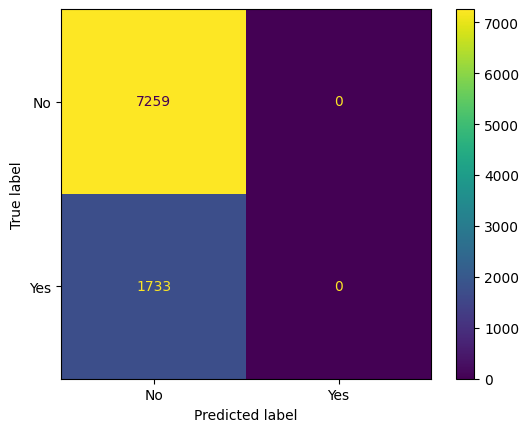

In [ ]:
# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

In [ ]:
# Imprimir relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      7259
         Yes       0.00      0.00      0.00      1733

    accuracy                           0.81      8992
   macro avg       0.40      0.50      0.45      8992
weighted avg       0.65      0.81      0.72      8992



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir variáveis X e y
X = sd.drop(columns=['Churned', 'User_id', 'Subscription_type'])
y = sd['Churned']

In [ ]:
# Codificar variáveis categóricas
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

In [ ]:
# Separar em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar modelo de Regressão Logística
logistic_model = LogisticRegression()

In [ ]:
# Definir grid de parâmetros para ajuste fino
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
# Inicializar GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Treinar o modelo com ajuste fino
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores Parâmetros Encontrados:", best_params)

Melhores Parâmetros Encontrados: {'C': 0.001}


In [ ]:
# Fazer previsões com o modelo ajustado
y_pred_tuned = grid_search.predict(X_test)

In [ ]:
# Avaliar o modelo ajustado
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nMatriz de Confusão (Modelo Ajustado):")
print(conf_matrix_tuned)


Matriz de Confusão (Modelo Ajustado):
[[7259    0]
 [1733    0]]


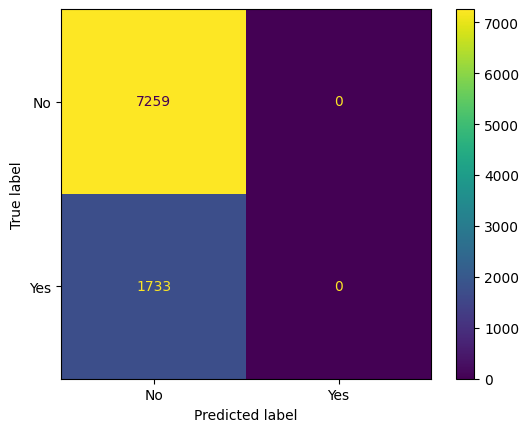

In [ ]:
# Plotar a matriz de confusão
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned, display_labels=grid_search.classes_)
disp_tuned.plot()

In [ ]:
# Imprimir relatório de classificação
print("\nRelatório de Classificação (Modelo Ajustado):")
print(classification_report(y_test, y_pred_tuned))


Relatório de Classificação (Modelo Ajustado):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      7259
         Yes       0.00      0.00      0.00      1733

    accuracy                           0.81      8992
   macro avg       0.40      0.50      0.45      8992
weighted avg       0.65      0.81      0.72      8992



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inicializar o classificador Random Forest
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
# Treinar o modelo com os dados de treinamento
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Fazer previsões nos dados de teste
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusão (Random Forest):")
print(conf_matrix_rf)


Matriz de Confusão (Random Forest):
[[7152  107]
 [1257  476]]


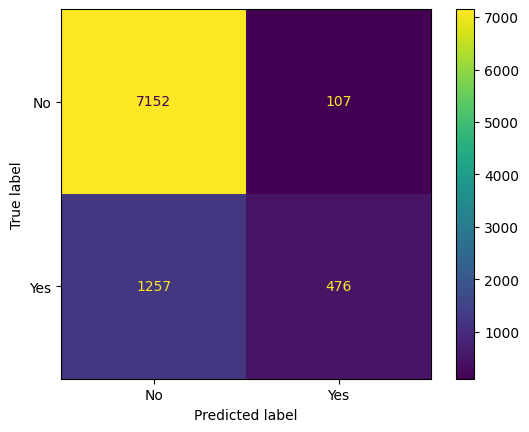

In [ ]:
# Plotar a matriz de confusão
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
disp_rf.plot()

In [ ]:
# Imprimir relatório de classificação
print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

          No       0.85      0.99      0.91      7259
         Yes       0.82      0.27      0.41      1733

    accuracy                           0.85      8992
   macro avg       0.83      0.63      0.66      8992
weighted avg       0.84      0.85      0.82      8992

